In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split    
from sklearn.svm import SVC
from sklearn.metrics import classification_report  
from sklearn.metrics import confusion_matrix, accuracy_score

url = 'D:\\__Max__\\Documents\\Machine Learning Course LANIA\\Recursos complementarios-20210804\\Datasets\\Failure prediction.csv'
failure = pd.read_csv(url)
print(failure.shape)
print(failure.head())

(700, 9)
  GOAL-Broken    Random  Machine nbr  lifetime  pressureInd  moistureInd  \
0         Yes  0.437420          723        60    77.836105   112.832544   
1         Yes  0.688345          107        88    89.350620    95.228125   
2          No  0.805670          153        30   130.089477    96.367747   
3         Yes  0.923187          140        79    87.421990   110.941574   
4          No  0.036583          359         2    69.939898    86.292387   

   temperatureInd  team  provider  
0      121.786371     3         3  
1       99.082317     1         4  
2      103.608344     1         3  
3      129.691510     2         1  
4       91.861983     3         3  


In [36]:
propiedades = failure.iloc[:,1:]
objetivo = failure['GOAL-Broken']
print(propiedades.head())
print(objetivo.head())

     Random  Machine nbr  lifetime  pressureInd  moistureInd  temperatureInd  \
0  0.437420          723        60    77.836105   112.832544      121.786371   
1  0.688345          107        88    89.350620    95.228125       99.082317   
2  0.805670          153        30   130.089477    96.367747      103.608344   
3  0.923187          140        79    87.421990   110.941574      129.691510   
4  0.036583          359         2    69.939898    86.292387       91.861983   

   team  provider  
0     3         3  
1     1         4  
2     1         3  
3     2         1  
4     3         3  
0    Yes
1    Yes
2     No
3    Yes
4     No
Name: GOAL-Broken, dtype: object


In [37]:
propiedades_train, propiedades_test, objetivo_train, objetivo_test = train_test_split(propiedades, objetivo, test_size=0.2, random_state=0)
print('Número de instancias de entrenamiento: '+str(len(propiedades_train)))
print('Número de instancias de pureba: '+str(len(propiedades_test)))
print('Número de instancias totales: '+str(len(failure.index)))

Número de instancias de entrenamiento: 560
Número de instancias de pureba: 140
Número de instancias totales: 700


## Algoritmo: Máquina de Soporte Vectorial Clasificación para la predicción de fallas.

In [38]:
modelo = SVC(kernel = 'rbf')
modelo.fit(propiedades_train, objetivo_train)

SVC()

In [39]:
prediccion_objetivo = modelo.predict(propiedades_test)

In [40]:
print(classification_report(objetivo_test, prediccion_objetivo))

              precision    recall  f1-score   support

          No       0.77      0.82      0.80        80
         Yes       0.74      0.67      0.70        60

    accuracy                           0.76       140
   macro avg       0.75      0.75      0.75       140
weighted avg       0.76      0.76      0.76       140



In [42]:
MC = confusion_matrix(objetivo_test, prediccion_objetivo)
print(MC)
print(accuracy_score(objetivo_test, prediccion_objetivo))

[[66 14]
 [20 40]]
0.7571428571428571


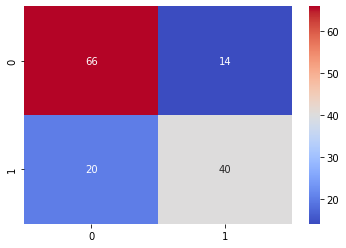

In [28]:
sns.heatmap(MC, annot=True, cbar=True, cmap="coolwarm")
plt.show()

## Algoritmo: Perceptrón Multicapa Clasificación para la predicción de fallas.

In [32]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 
pmc = MLPClassifier(activation='relu',
                    solver = 'adam',
                    hidden_layer_sizes=(7),
                    verbose=True,
                    learning_rate_init=0.01)

pmc.fit(propiedades_train, objetivo_train)

Iteration 1, loss = 7.28907659
Iteration 2, loss = 6.54842706
Iteration 3, loss = 2.94329151
Iteration 4, loss = 4.12107812
Iteration 5, loss = 2.14398615
Iteration 6, loss = 2.77587546
Iteration 7, loss = 1.72089330
Iteration 8, loss = 2.11989708
Iteration 9, loss = 1.65386103
Iteration 10, loss = 1.63638774
Iteration 11, loss = 1.50872558
Iteration 12, loss = 1.40199729
Iteration 13, loss = 1.47487195
Iteration 14, loss = 1.29264784
Iteration 15, loss = 1.32152900
Iteration 16, loss = 1.24522981
Iteration 17, loss = 1.17478940
Iteration 18, loss = 1.23925565
Iteration 19, loss = 1.18806630
Iteration 20, loss = 1.11849549
Iteration 21, loss = 1.10323720
Iteration 22, loss = 1.01256806
Iteration 23, loss = 1.02770038
Iteration 24, loss = 0.98104998
Iteration 25, loss = 0.96476231
Iteration 26, loss = 0.93633468
Iteration 27, loss = 0.92956648
Iteration 28, loss = 0.94008027
Iteration 29, loss = 0.89538770
Iteration 30, loss = 0.92593353
Iteration 31, loss = 0.86565039
Iteration 32, los

MLPClassifier(hidden_layer_sizes=7, learning_rate_init=0.01, verbose=True)

In [43]:
objetivo_pred=pmc.predict(propiedades_test)
accuracy_score(objetivo_test, objetivo_pred)

0.8

In [44]:
print(classification_report(objetivo_test, objetivo_pred))

              precision    recall  f1-score   support

          No       0.82      0.82      0.82        80
         Yes       0.77      0.77      0.77        60

    accuracy                           0.80       140
   macro avg       0.80      0.80      0.80       140
weighted avg       0.80      0.80      0.80       140



In [45]:
CM_pmc = confusion_matrix(objetivo_test, objetivo_pred)
print(CM_pmc)

[[66 14]
 [14 46]]


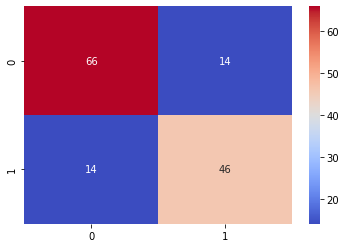

In [46]:
sns.heatmap(CM_pmc, annot=True, cbar=True, cmap="coolwarm")
plt.show()

## Algoritmo: KNN Clasificación para la predicción de fallas.

In [48]:
from sklearn.neighbors import KNeighborsClassifier

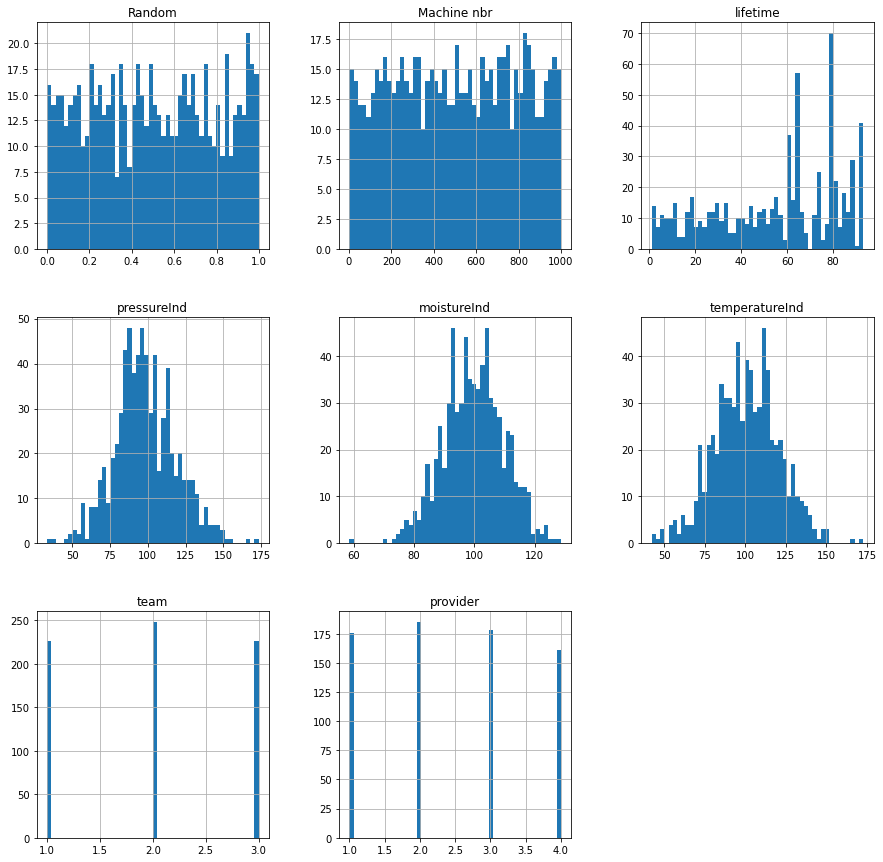

In [49]:
failure.hist(bins=50, figsize=(15,15))
plt.show()

In [78]:
knn = KNeighborsClassifier(n_neighbors=21, metric='euclidean')
knn.fit(propiedades_train, objetivo_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=21)

In [79]:
prediccion_obj = knn.predict(propiedades_test)
print(prediccion_obj)

['No' 'No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No'
 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'No'
 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes'
 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'No'
 'Yes' 'Yes' 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'Yes'
 'No' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes'
 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'Yes'
 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'Yes'
 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'No'
 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes'
 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes']


In [80]:
prob_predict = knn.predict_proba(propiedades_test)
print("No falló     falló")
print(prob_predict)

No falló     falló
[[0.80952381 0.19047619]
 [1.         0.        ]
 [0.61904762 0.38095238]
 [0.42857143 0.57142857]
 [0.33333333 0.66666667]
 [0.42857143 0.57142857]
 [0.80952381 0.19047619]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.80952381 0.19047619]
 [0.42857143 0.57142857]
 [0.9047619  0.0952381 ]
 [0.85714286 0.14285714]
 [0.76190476 0.23809524]
 [0.52380952 0.47619048]
 [0.23809524 0.76190476]
 [0.61904762 0.38095238]
 [0.52380952 0.47619048]
 [0.71428571 0.28571429]
 [0.47619048 0.52380952]
 [0.61904762 0.38095238]
 [0.95238095 0.04761905]
 [0.42857143 0.57142857]
 [0.23809524 0.76190476]
 [0.66666667 0.33333333]
 [0.71428571 0.28571429]
 [0.85714286 0.14285714]
 [0.47619048 0.52380952]
 [0.80952381 0.19047619]
 [0.47619048 0.52380952]
 [0.52380952 0.47619048]
 [0.85714286 0.14285714]
 [0.80952381 0.19047619]
 [0.28571429 0.71428571]
 [0.23809524 0.76190476]
 [0.76190476 0.23809524]
 [0.61904762 0.38095238]
 [0.14285714 0.85714286]
 [0.38095238 0.61904762]
 [0.47

In [81]:
acc = accuracy_score(objetivo_test, prediccion_obj)
acc

0.7714285714285715

In [82]:
print(classification_report(objetivo_test, prediccion_obj))

              precision    recall  f1-score   support

          No       0.80      0.80      0.80        80
         Yes       0.73      0.73      0.73        60

    accuracy                           0.77       140
   macro avg       0.77      0.77      0.77       140
weighted avg       0.77      0.77      0.77       140



In [83]:
MatConf = confusion_matrix(objetivo_test, prediccion_obj)
print(MatConf)

[[64 16]
 [16 44]]


In [84]:
tasa_error = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn.fit(propiedades_train, objetivo_train)
    pred_i = knn.predict(propiedades_test)
    tasa_error.append(np.mean(pred_i != objetivo_test))

Text(0, 0.5, 'Tasa de error')

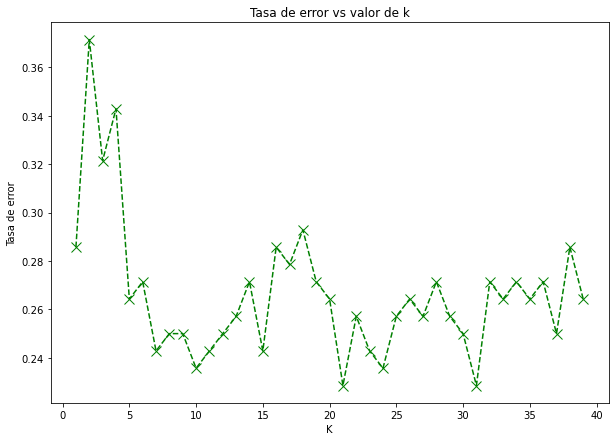

In [85]:
plt.figure(figsize=(10,7))
plt.plot(range(1,40),tasa_error,color='green',linestyle='dashed',marker='x',markerfacecolor='red',markersize=10)
plt.title('Tasa de error vs valor de k')
plt.xlabel('K')
plt.ylabel('Tasa de error')

In [88]:
precision = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn.fit(propiedades_train, objetivo_train)
    pred_i = knn.predict(propiedades_test)
    precision.append(accuracy_score(objetivo_test, pred_i))

Text(0, 0.5, 'Precisión')

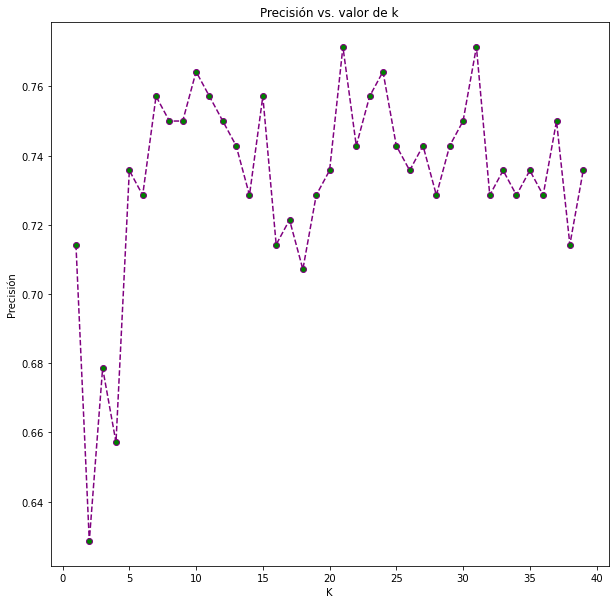

In [89]:
plt.figure(figsize=(10,10))
plt.plot(range(1,40),precision,color='purple',linestyle='dashed',marker='o',markerfacecolor='green',markersize=6)
plt.title('Precisión vs. valor de k')
plt.xlabel('K')
plt.ylabel('Precisión')

## Resumen de Resultados por Algoritmo

In [3]:
Results_df = pd.DataFrame({'Algoritmo Clasificación':['Árbol de decisión', 'Regresión Logística', 'Perceptrón Multicapa', 'KNN', 'Máquina de Soporte Vectorial'],
                           'Accuracy':[0.95, 0.82, 0.8, 0.77, 0.76],
                           'Negativo-Verdadero':[75, 65, 66 , 64, 66],
                           'Positivo-Verdadero':[58, 50, 46, 44, 40]
                          })
Results_df

,Algoritmo Clasificación,Accuracy,Negativo-Verdadero,Positivo-Verdadero
0,Árbol de decisión,0.95,75,58
1,Regresión Logística,0.82,65,50
2,Perceptrón Multicapa,0.80,66,46
3,KNN,0.77,64,44
4,Máquina de Soporte Vectorial,0.76,66,40
